# **1. Perkenalan Dataset**


Pada project Machine Learning kali ini, saya menggunakan dataset **Global Food Waste** yang diperoleh dari Kaggle, yang berisi 5.000 data tentang food waste di 20 negara selama 7 tahun (2018-2024) dan mencakup 8 kategori makanan. Dataset ini terdiri dari data kategorikal, seperti negara dan kategori makanan, serta data numerik, seperti jumlah limbah makanan (tons), kerugian ekonomi (juta dolar), dan persentase limbah rumah tangga.

Karena dataset ini tidak memiliki label, saya akan menggunakannya untuk analisis unsupervised learning, seperti clustering untuk melihat pola food waste secara global dan mengidentifikasi kelompok negara/kategori makanan yang membutuhkan perhatian lebih dalam mengurangi pemborosan makanan.

Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   https://www.kaggle.com/datasets/atharvasoundankar/global-food-wastage-dataset-2018-2024
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris dan Kolom**: 5000 dan 8
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - Kolom Numerikal: ['Year', 'Total Waste (Tons)', 'Economic Loss (Million $)', 'Avg Waste per Capita (Kg)', 'Population (Million)', 'Household Waste (%)']
     - Kolom Kategorikal: ['Country', 'Food Category']
3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [69]:
df = pd.read_csv("Dataset_inisiasi.csv")
df.head()

,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
0,Australia,2019,Fruits & Vegetables,19268.63,18686.68,72.69,87.59,53.64
1,Indonesia,2019,Prepared Food,3916.97,4394.48,192.52,1153.99,30.61
2,Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08
3,France,2023,Fruits & Vegetables,46299.69,40551.22,120.19,953.05,31.91
4,France,2023,Beverages,33096.57,36980.82,104.74,1105.47,36.06


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

#### **4.1 Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    5000 non-null   object 
 1   Year                       5000 non-null   int64  
 2   Food Category              5000 non-null   object 
 3   Total Waste (Tons)         5000 non-null   float64
 4   Economic Loss (Million $)  5000 non-null   float64
 5   Avg Waste per Capita (Kg)  5000 non-null   float64
 6   Population (Million)       5000 non-null   float64
 7   Household Waste (%)        5000 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 312.6+ KB


**Insight**

Dataset terdiri dari 5000 baris dan 8 kolom.





In [71]:
print(df.dtypes)

Country                       object
Year                           int64
Food Category                 object
Total Waste (Tons)           float64
Economic Loss (Million $)    float64
Avg Waste per Capita (Kg)    float64
Population (Million)         float64
Household Waste (%)          float64
dtype: object


In [72]:
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print("Variabel Numerikal:", numerical_features)
print("Variabel Kategorikal:", categorical_features)

Variabel Numerikal: ['Year', 'Total Waste (Tons)', 'Economic Loss (Million $)', 'Avg Waste per Capita (Kg)', 'Population (Million)', 'Household Waste (%)']
Variabel Kategorikal: ['Country', 'Food Category']


**Insight**

Kategorikal

- Country : nama negara tempat data dikumpulkan.

- Food Category : kategori makanan yang mengalami pemborosan (misalnya sayuran, buah, daging, dll.).

Numerikal

- Year : tahun data dikumpulkan.

- Total Waste (Tons) : jumlah total limbah makanan dalam satuan ton.

- Economic Loss (Million $) : kerugian ekonomi akibat limbah makanan dalam juta dolar.

- Avg Waste per Capita (Kg) : rata-rata jumlah limbah makanan yang dihasilkan per individu dalam satuan kg.

- Population (Million) : jumlah populasi negara dalam satuan juta jiwa.

- Household Waste (%) : persentase limbah makanan yang berasal dari rumah tangga dibandingkan dengan total limbah

In [73]:
df.describe()

,Year,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2021.015600,25061.780072,25039.703870,109.46397,706.606416,50.060890
std,1.999239,14245.119588,14620.236429,51.93373,402.546464,11.596203
min,2018.000000,502.610000,406.690000,20.09000,11.290000,30.020000
25%,2019.000000,12783.737500,12612.477500,64.05000,350.602500,40.012500
50%,2021.000000,24865.220000,24428.155000,110.08000,713.530000,50.295000
75%,2023.000000,37471.035000,37146.037500,154.52500,1057.255000,60.125000
max,2024.000000,49990.760000,59228.930000,199.97000,1399.970000,70.000000


####**4.2. Menangani Data yang Hilang**
- Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

In [74]:
df.isnull().sum()

,0
Country,0
Year,0
Food Category,0
Total Waste (Tons),0
Economic Loss (Million $),0
Avg Waste per Capita (Kg),0
Population (Million),0
Household Waste (%),0


####**4.3 Analisis Distribusi dan Korelasi**  
  - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
  - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

In [75]:
df.describe()

,Year,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2021.015600,25061.780072,25039.703870,109.46397,706.606416,50.060890
std,1.999239,14245.119588,14620.236429,51.93373,402.546464,11.596203
min,2018.000000,502.610000,406.690000,20.09000,11.290000,30.020000
25%,2019.000000,12783.737500,12612.477500,64.05000,350.602500,40.012500
50%,2021.000000,24865.220000,24428.155000,110.08000,713.530000,50.295000
75%,2023.000000,37471.035000,37146.037500,154.52500,1057.255000,60.125000
max,2024.000000,49990.760000,59228.930000,199.97000,1399.970000,70.000000


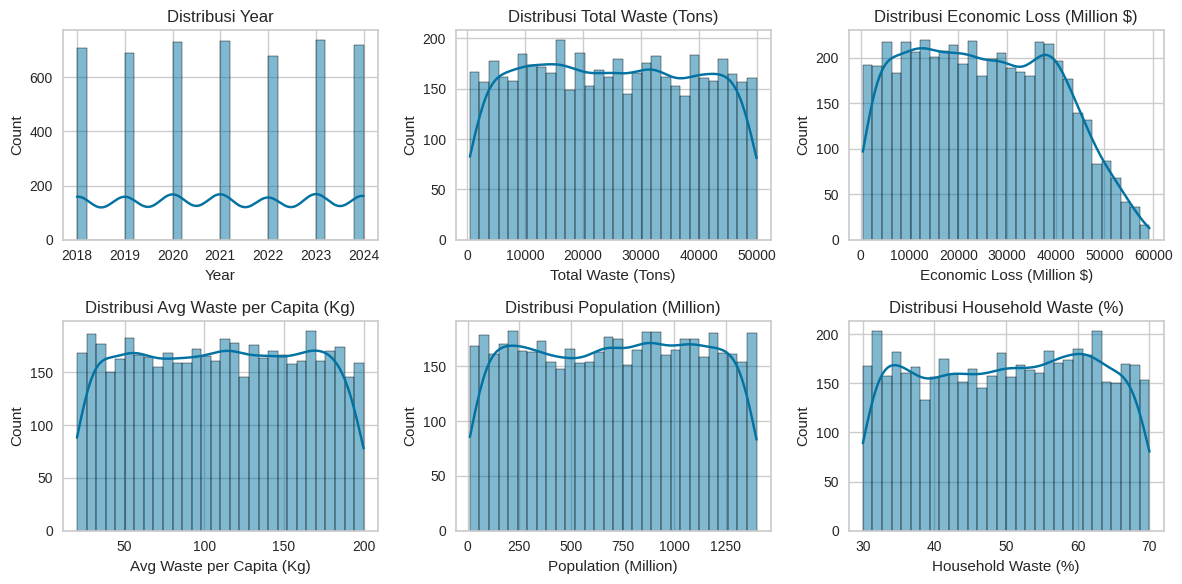

In [76]:
# histogram distribusi kolom numeric

plt.figure(figsize=(12, 6))
for i, col in enumerate(df.select_dtypes(include=['int64', 'float64']).columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribusi {col}")
plt.tight_layout()
plt.show()

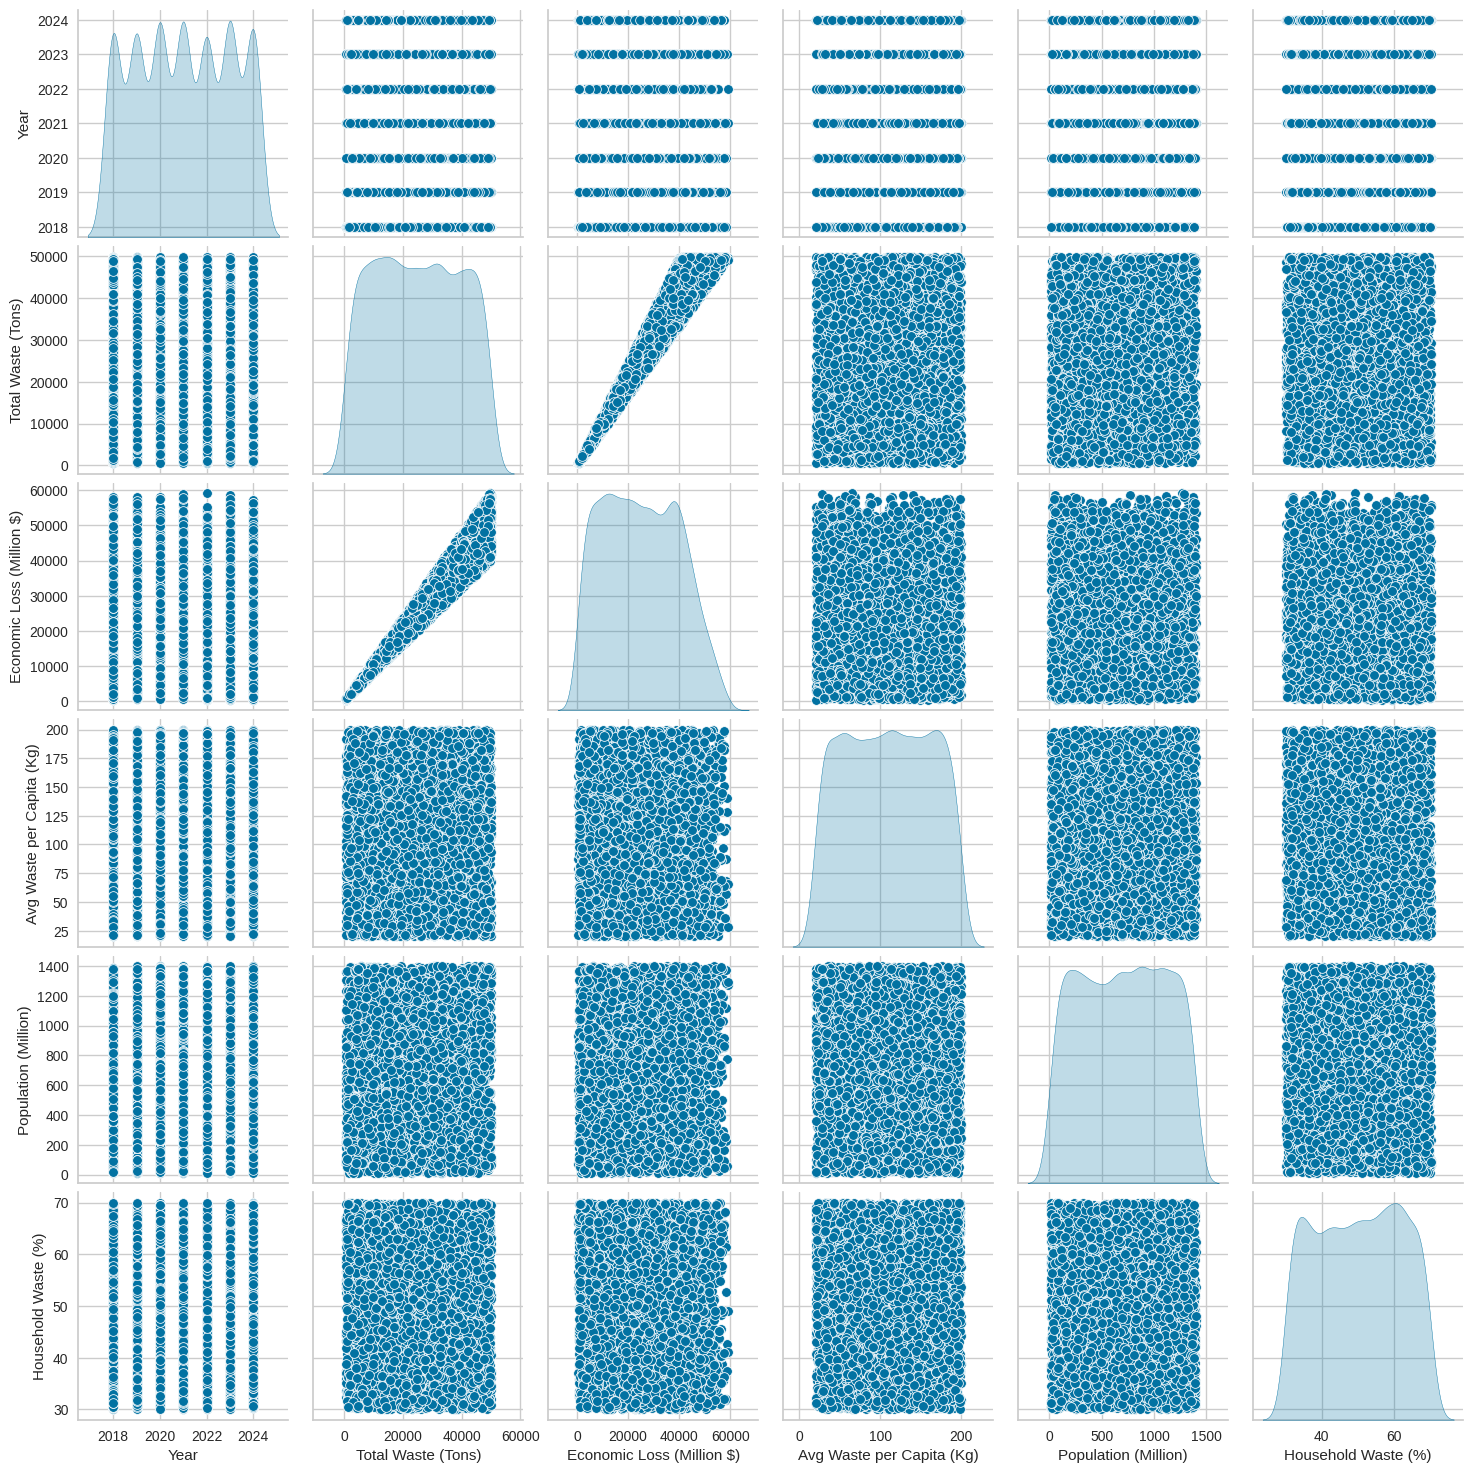

In [77]:
# Scatter Plot (Pairplot)
sns.pairplot(df.select_dtypes(include=['int64', 'float64']), diag_kind='kde')
plt.show()

####**4.4. Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

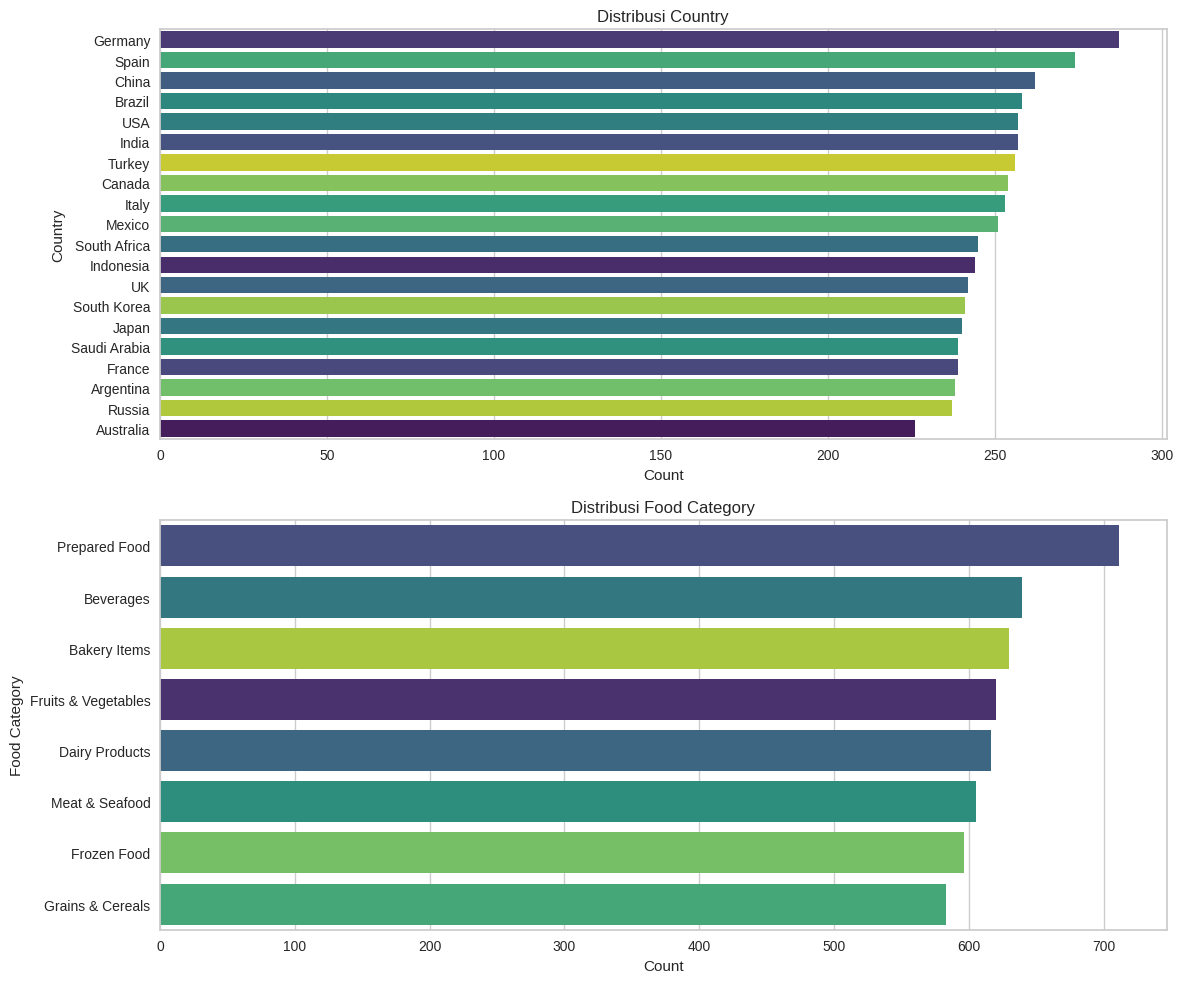

In [78]:
# Visualisasi Distribusi Variabel Kategorikal
plt.figure(figsize=(12, 10))

for i, col in enumerate(df.select_dtypes(include=['object', 'category']).columns, 1):
    plt.subplot(len(df.select_dtypes(include=['object', 'category']).columns), 1, i)
    sns.countplot(y=df[col], order=df[col].value_counts().index, hue=df[col], palette="viridis", legend=False)
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.title(f"Distribusi {col}")

plt.tight_layout()
plt.show()

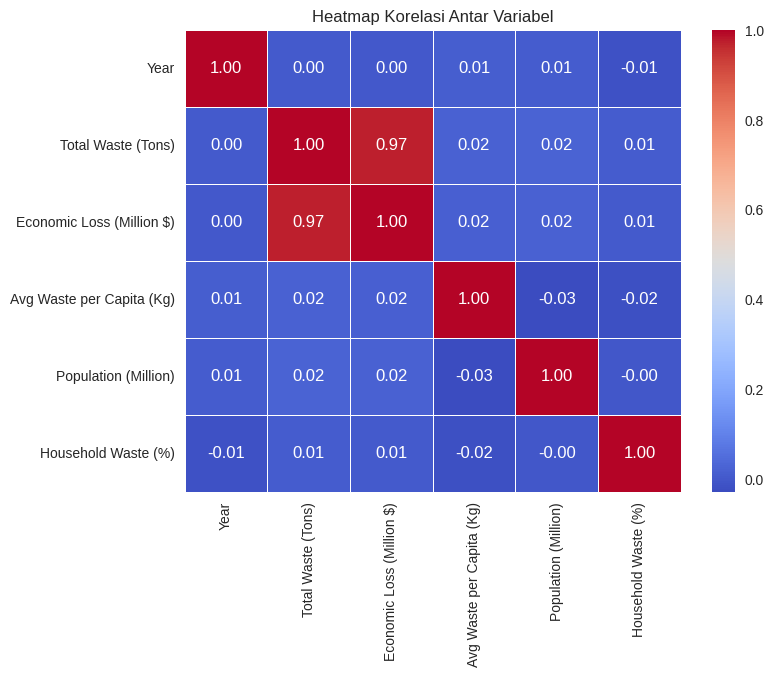

In [79]:
# Hitung korelasi
df_numeric = df.select_dtypes(include=['number'])
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

###5.1 Menghapus atau Menangani Data Kosong (Missing Values)

In [80]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0


###5.2 Menghapus Data Duplikat

In [81]:
df.duplicated().sum()

0

In [82]:
df.head()

,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
0,Australia,2019,Fruits & Vegetables,19268.63,18686.68,72.69,87.59,53.64
1,Indonesia,2019,Prepared Food,3916.97,4394.48,192.52,1153.99,30.61
2,Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08
3,France,2023,Fruits & Vegetables,46299.69,40551.22,120.19,953.05,31.91
4,France,2023,Beverages,33096.57,36980.82,104.74,1105.47,36.06


###5.3 Normalisasi atau Standarisasi Fitur

In [83]:
selected_features = df[['Total Waste (Tons)', 'Economic Loss (Million $)']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

In [84]:
print("Jumlah kolom scaled_features sebelum inverse:", scaled_features.shape[1])

Jumlah kolom scaled_features sebelum inverse: 2


###5.4 Deteksi dan Penanganan Outlier

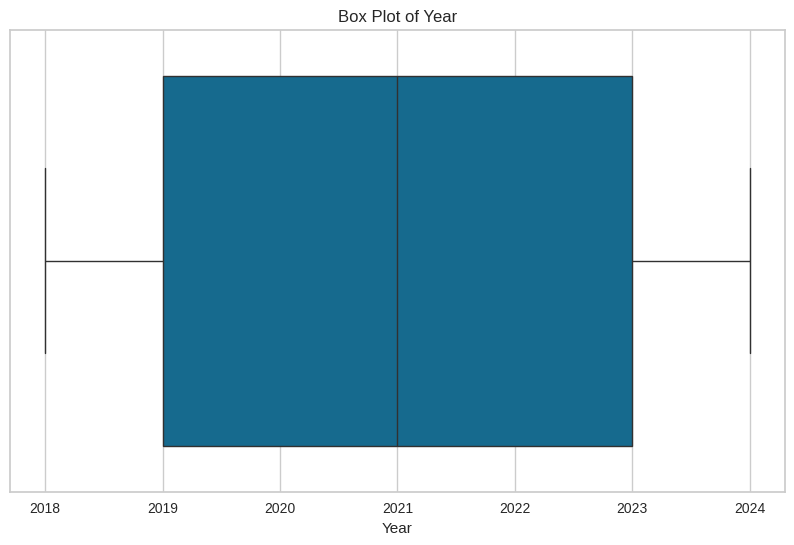

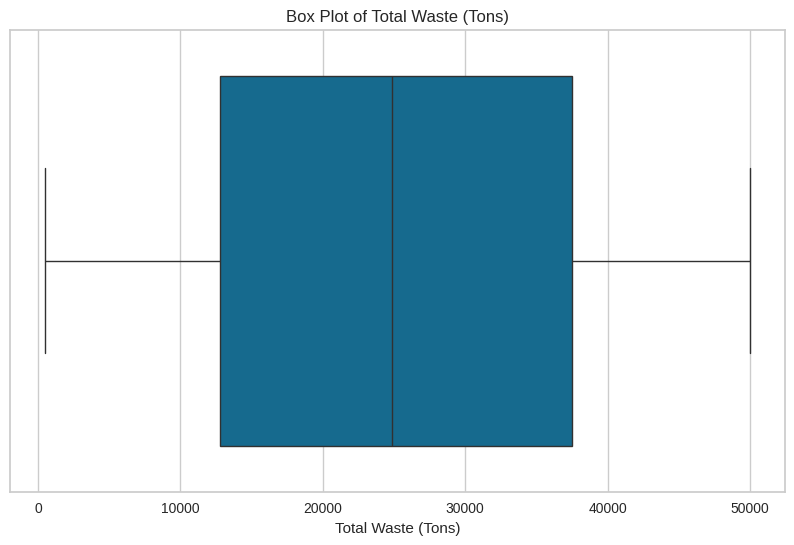

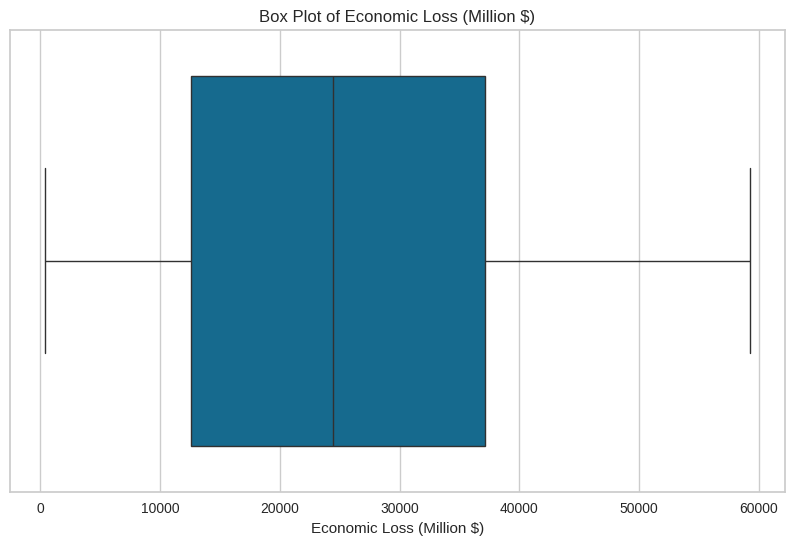

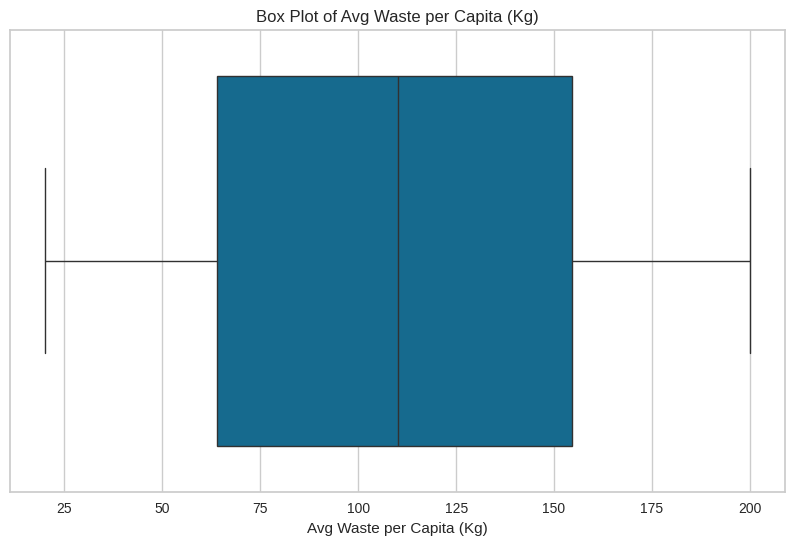

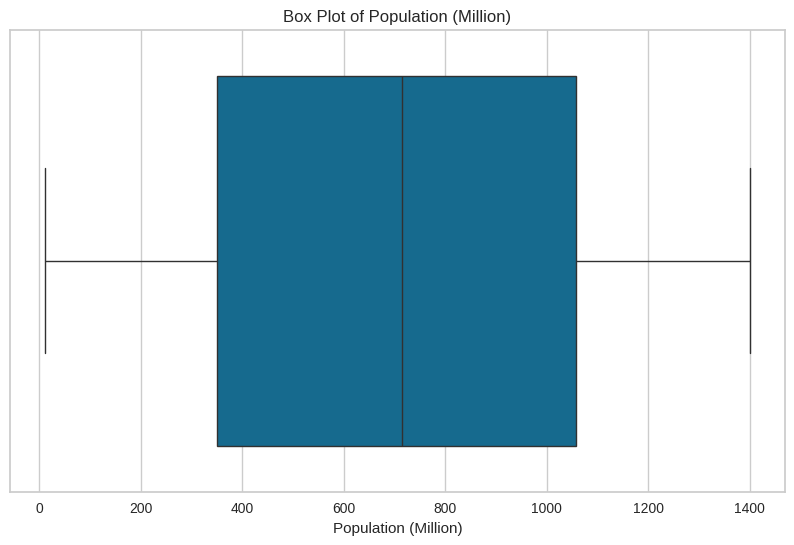

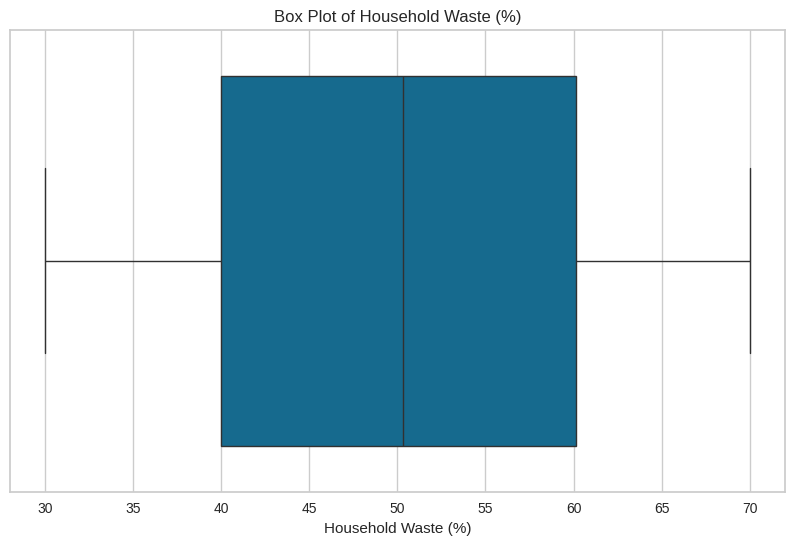

In [85]:
for feature in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

**Insight**

Dataset ini tidak memiliki outliers, yang berarti datanya terdistribusi dengan baik tanpa nilai ekstrem yang mengganggu. Ini menunjukkan bahwa data mungkin sudah bersih atau homogen, sehingga analisis bisa dilakukan dengan metode statistik standar seperti mean tanpa takut bias.

###5.5 Encoding Data Kategorikal

In [86]:
label_encoders = {}

for col in categorical_features:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

df.head()

,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
0,1,2019,4,19268.63,18686.68,72.69,87.59,53.64
1,8,2019,7,3916.97,4394.48,192.52,1153.99,30.61
2,6,2022,2,9700.16,8909.16,166.94,1006.11,48.08
3,5,2023,4,46299.69,40551.22,120.19,953.05,31.91
4,5,2023,1,33096.57,36980.82,104.74,1105.47,36.06


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai : Saya menggunakan algoritma K-Means karena metode ini efektif untuk mengelompokkan data Food Waste berdasarkan pola yang tersembunyi dalam variabel numerik seperti total limbah dan kerugian ekonomi.
2. Latih model dengan data menggunakan algoritma tersebut.

In [87]:
inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_features)

    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, labels))

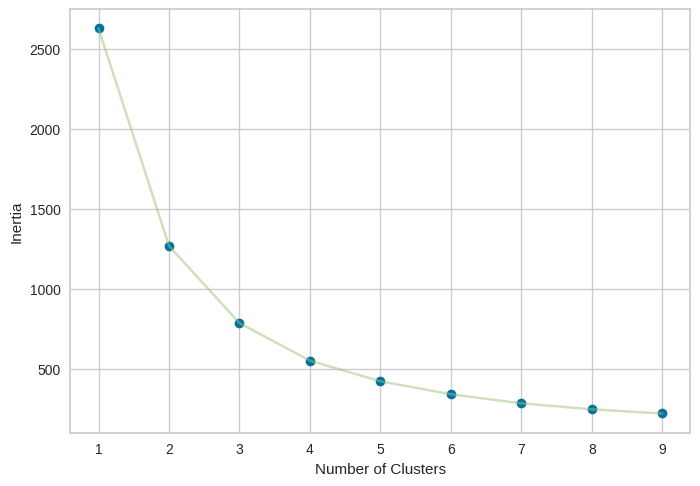

In [88]:
plt.plot(np.arange(1, len(inertia) + 1), inertia, 'o')
plt.plot(np.arange(1, len(inertia) + 1), inertia, '-', alpha=0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [89]:
optimal_k = 2

# Inisialisasi dan jalankan K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(scaled_features)

# Hitung Silhouette Score
score = silhouette_score(scaled_features, labels)

print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.61


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [90]:
print("Jumlah fitur sebelum PCA:", scaled_features.shape[1])

Jumlah fitur sebelum PCA: 2


In [91]:
# Tentukan jumlah komponen utama
n_components = min(2, scaled_features.shape[1])
pca = PCA(n_components=n_components)

# Transformasi data dengan PCA
pca_data = pca.fit_transform(scaled_features)

print(f"PCA diterapkan dengan {n_components} komponen utama.")

PCA diterapkan dengan 2 komponen utama.


In [92]:
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111))
    algorithm.fit(pca_data)
    inertia.append(algorithm.inertia_)

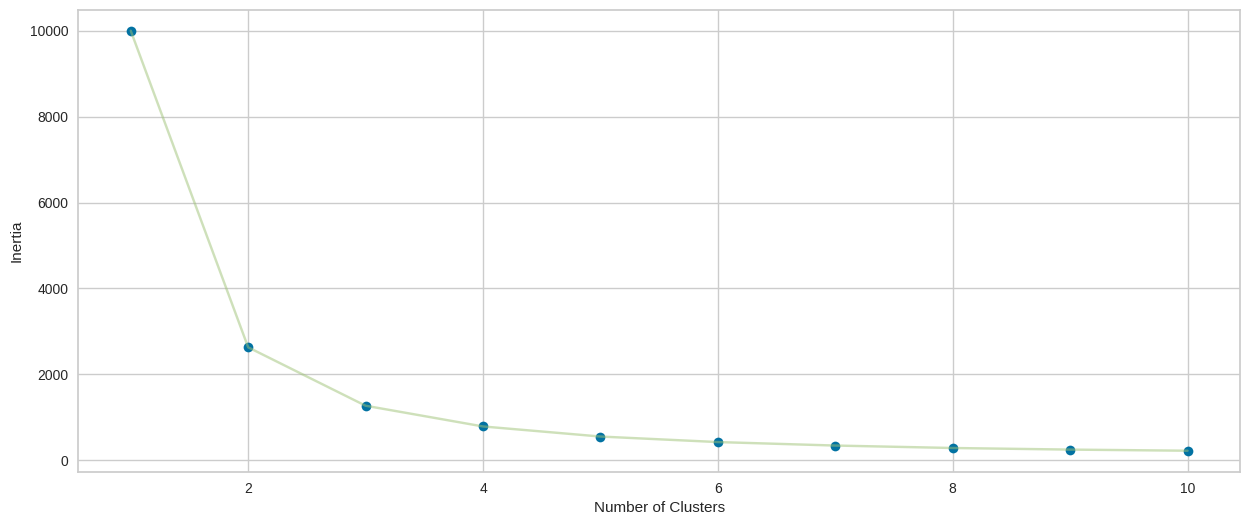

In [93]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [94]:
# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(pca_data)

# Silhouette Score
sil_score = silhouette_score(pca_data, cluster_labels)
print(f"Silhouette Score untuk data yang direduksi dengan PCA: {sil_score:.2f}")

Silhouette Score untuk data yang direduksi dengan PCA: 0.55


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

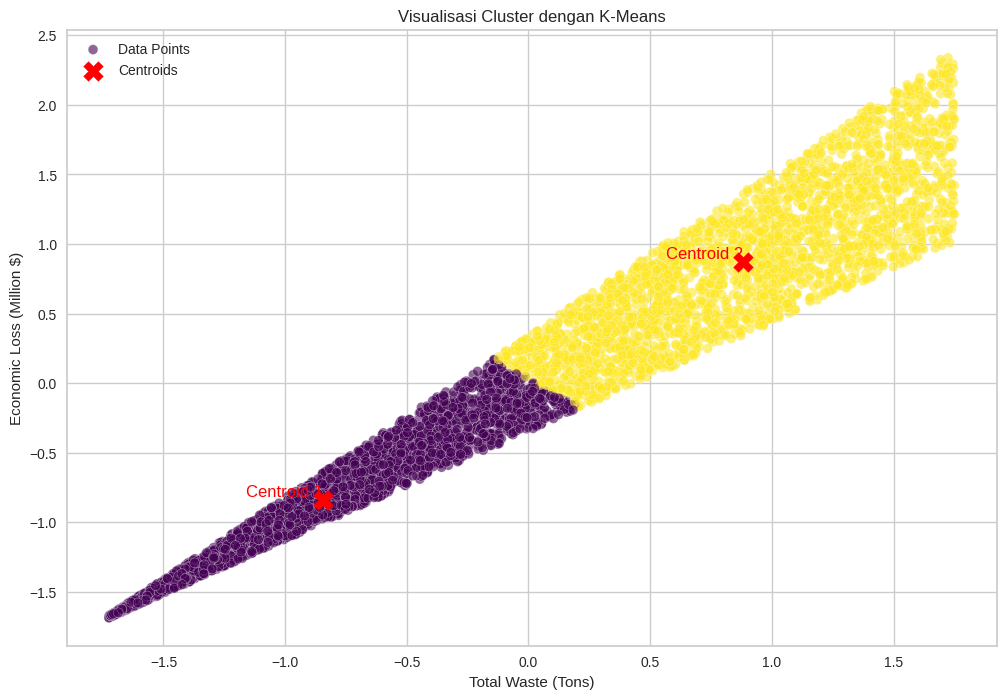

In [95]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(scaled_features)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualisasi cluster
plt.figure(figsize=(12, 8))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', fontsize=12, ha='right', va='bottom', color='red')

plt.xlabel('Total Waste (Tons)')
plt.ylabel('Economic Loss (Million $)')

plt.title('Visualisasi Cluster dengan K-Means')

plt.legend()

plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [96]:
# Tambahkan label cluster ke DataFrame yang sudah dinormalisasi
df["Cluster"] = kmeans.labels_

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [97]:
df[['Total Waste (Tons)', 'Economic Loss (Million $)']] = scaler.inverse_transform(scaled_features)

In [98]:
# Inverse Transform (Decoding)
for col in categorical_features:
    df[col] = label_encoders[col].inverse_transform(df[col])  # Kembalikan ke nilai asli

df.head()

,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%),Cluster
0,Australia,2019,Fruits & Vegetables,19268.63,18686.68,72.69,87.59,53.64,0
1,Indonesia,2019,Prepared Food,3916.97,4394.48,192.52,1153.99,30.61,0
2,Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08,0
3,France,2023,Fruits & Vegetables,46299.69,40551.22,120.19,953.05,31.91,1
4,France,2023,Beverages,33096.57,36980.82,104.74,1105.47,36.06,1


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [99]:
def explore_clusters(df, cluster_col):
    print("=== Explore Karakteristik Setiap Cluster ===\n")
    cluster_groups = df.groupby(cluster_col)

    for cluster_id, group in cluster_groups:
        print(f"Cluster {cluster_id}:")
        print(df.describe())
        print("\n")

explore_clusters(df, "Cluster")

=== Explore Karakteristik Setiap Cluster ===

Cluster 0:
              Year  Total Waste (Tons)  Economic Loss (Million $)  \
count  5000.000000         5000.000000                5000.000000   
mean   2021.015600        25061.780072               25039.703870   
std       1.999239        14245.119588               14620.236429   
min    2018.000000          502.610000                 406.690000   
25%    2019.000000        12783.737500               12612.477500   
50%    2021.000000        24865.220000               24428.155000   
75%    2023.000000        37471.035000               37146.037500   
max    2024.000000        49990.760000               59228.930000   

       Avg Waste per Capita (Kg)  Population (Million)  Household Waste (%)  \
count                 5000.00000           5000.000000          5000.000000   
mean                   109.46397            706.606416            50.060890   
std                     51.93373            402.546464            11.596203   
min  

In [100]:
# Analisis karakteristik setiap cluster
print("Analisis Karakteristik Cluster dari Model KMeans\n")
for cluster_id in range(optimal_k):
    cluster_data = df[df["Cluster"] == cluster_id]
    mean_waste = cluster_data["Total Waste (Tons)"].mean()
    mean_loss = cluster_data["Economic Loss (Million $)"].mean()

    print(f"Cluster {cluster_id}:")
    print(f"- Rata-rata Total Waste (Tons): {mean_waste:.2f}")
    print(f"- Rata-rata Economic Loss (Million $): {mean_loss:.2f}\n")

Analisis Karakteristik Cluster dari Model KMeans

Cluster 0:
- Rata-rata Total Waste (Tons): 13046.70
- Rata-rata Economic Loss (Million $): 12834.70

Cluster 1:
- Rata-rata Total Waste (Tons): 37637.53
- Rata-rata Economic Loss (Million $): 37814.24



# **Analisis Karakteristik Cluster dari Model KMeans**

#**Cluster 0: Low-Waste Economies**

- **Rata-rata Total Waste (Tons)**: 13,046.70

- **Rata-rata Economic Loss (Million $)**: 12,834.70

- **Analisis** : Wilayah dalam cluster ini memiliki **jumlah limbah dan kerugian ekonomi yang lebih rendah**, kemungkinan karena sistem pengelolaan limbah yang lebih baik atau tingkat konsumsi yang lebih kecil.

# **Cluster 1: High-Waste Economies**

- **Rata-rata Total Waste (Tons)**: 37,637.53

- **Rata-rata Economic Loss (Million $)**: 37,814.24

- **Analisis** : Wilayah dalam cluster ini memiliki **jumlah limbah tinggi dengan kerugian ekonomi besar**, kemungkinan karena konsumsi yang lebih tinggi atau sistem pengelolaan limbah yang kurang efisien.

#**Interpretasi**
- Hasil clustering sesuai dengan logika bisnis: **Semakin tinggi jumlah limbah, semakin besar pula potensi kerugian ekonomi yang ditimbulkan.**
- Cluster 0 (Low-Waste Economies) memiliki sistem pengelolaan limbah yang lebih efisien atau tingkat konsumsi yang lebih rendah, sehingga kerugian ekonominya lebih kecil. Bisa dijadikan contoh dalam pengelolaan limbah dan strategi ekonominya.
- Cluster 1 (High-Waste Economies) perlu fokus pada kebijakan pengurangan limbah dan peningkatan infrastruktur pengelolaan limbah untuk mengurangi dampak ekonominya. Bisa menjadi fokus utama dalam perbaikan kebijakan lingkungan dan investasi pada infrastruktur pengelolaan limbah.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [101]:
# export data
df.to_csv('Dataset_clustering.csv', index=False)